In [28]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy

#Import the request library
import requests

#Import API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [42]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longtitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        print(city)
# Print the city count to confirm sufficient count.
len(cities)

coquimbo
ushuaia
cherskiy
belushya guba
cidreira
barrow
albany
aksu
fare
vaini
clyde river
hobart
jaciara
abha
castro
mahebourg
portland
port elizabeth
barentsburg
qaanaaq
milkovo
punta arenas
kapaa
aleksandrov gay
saldanha
bluff
northam
raga
sentyabrskiy
camopi
himora
balkhash
mataura
busselton
faanui
atuona
borogontsy
tuktoyaktuk
labuhan
hasaki
port alfred
millinocket
georgetown
datia
avarua
pierre
havoysund
butaritari
saint george
vardo
elko
falealupo
ponta do sol
hami
osa
kenai
jamestown
gosainganj
raduzhnyy
dalvik
rikitea
san cristobal
hilo
hithadhoo
constitucion
yangambi
tabiauea
husavik
luderitz
bannu
grand river south east
mandalgovi
mar del plata
ngunguru
ancud
ilulissat
taolanaro
victoria
samarai
puerto ayora
goderich
tabialan
sao gabriel da cachoeira
khani
hermanus
kavieng
maumere
namatanai
saint-philippe
mehamn
bathsheba
luba
marawi
leningradskiy
severnoye
cape town
beloha
linxia
mirabad
post falls
sangar
karratha
khatanga
mashhad
thompson
nikolskoye
longyearbyen
alta flore

607

In [34]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | coquimbo
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | aksu
Processing Record 9 of Set 1 | fare
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | clyde river
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | jaciara
Processing Record 14 of Set 1 | abha
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | milkovo
Processing Record 22 of Set 1 | punta are

Processing Record 41 of Set 4 | namibe
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | koson
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | carrefour
Processing Record 46 of Set 4 | abu samrah
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | stornoway
Processing Record 49 of Set 4 | kieta
Processing Record 50 of Set 4 | colares
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | lincoln
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | tefe
Processing Record 5 of Set 5 | bintulu
Processing Record 6 of Set 5 | chapais
Processing Record 7 of Set 5 | araouane
Processing Record 8 of Set 5 | san patricio
Processing Record 9 of Set 5 | bambous virieux
Processing Record 10 of Set 5 | souillac
Processing Record 11 of Set 5 | khonuu
City not found. Skipping...
Processing Record 12 of Set 5 | manzhouli
Processing Record 13 of Set 5 | buin
Processing Record 14 of Set 5 | pevek
P

Processing Record 32 of Set 8 | adrar
Processing Record 33 of Set 8 | anchorage
Processing Record 34 of Set 8 | slave lake
Processing Record 35 of Set 8 | santa ana arriba
Processing Record 36 of Set 8 | bushtyno
Processing Record 37 of Set 8 | zhob
Processing Record 38 of Set 8 | bastrop
Processing Record 39 of Set 8 | rio negro
Processing Record 40 of Set 8 | mchinji
Processing Record 41 of Set 8 | samfya
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | aykhal
Processing Record 44 of Set 8 | doha
Processing Record 45 of Set 8 | brigantine
Processing Record 46 of Set 8 | yar-sale
Processing Record 47 of Set 8 | abashiri
Processing Record 48 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 49 of Set 8 | salcininkai
Processing Record 50 of Set 8 | serdobsk
Processing Record 1 of Set 9 | riyadh
Processing Record 2 of Set 9 | beliator
Processing Record 3 of Set 9 | tezu
Processing Record 4 of Set 9 | tshane
Processing Record 5 of Set

Processing Record 20 of Set 12 | merritt island
Processing Record 21 of Set 12 | ampanihy
Processing Record 22 of Set 12 | nichinan
Processing Record 23 of Set 12 | aswan
Processing Record 24 of Set 12 | ardahan
Processing Record 25 of Set 12 | takoradi
Processing Record 26 of Set 12 | grindavik
Processing Record 27 of Set 12 | beloomut
Processing Record 28 of Set 12 | dao
Processing Record 29 of Set 12 | voloshka
Processing Record 30 of Set 12 | phan rang
City not found. Skipping...
Processing Record 31 of Set 12 | agdam
Processing Record 32 of Set 12 | kyabram
Processing Record 33 of Set 12 | krapkowice
Processing Record 34 of Set 12 | nanortalik
Processing Record 35 of Set 12 | boyolangu
Processing Record 36 of Set 12 | young
Processing Record 37 of Set 12 | hurricane
Processing Record 38 of Set 12 | pumiao
Processing Record 39 of Set 12 | banda aceh
Processing Record 40 of Set 12 | mayor pablo lagerenza
Processing Record 41 of Set 12 | tamandare
Processing Record 42 of Set 12 | mot

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coquimbo,-29.9533,-71.3436,59.00,88,0,8.05,CL,2021-01-17 01:29:38
1,Ushuaia,-54.8000,-68.3000,50.00,93,75,23.02,AR,2021-01-17 01:30:21
2,Cherskiy,68.7500,161.3000,-21.96,87,100,3.22,RU,2021-01-17 01:31:24
3,Cidreira,-30.1811,-50.2056,73.58,91,100,12.15,BR,2021-01-17 01:31:20
4,Barrow,71.2906,-156.7887,-0.40,78,90,19.57,US,2021-01-17 01:31:25
5,Albany,42.6001,-73.9662,37.00,69,100,1.01,US,2021-01-17 01:29:12
6,Aksu,41.1231,80.2644,10.18,87,0,2.06,CN,2021-01-17 01:31:25
7,Fare,-16.7000,-151.0167,81.72,75,0,11.74,PF,2021-01-17 01:31:25
8,Vaini,-21.2000,-175.2000,87.80,79,75,11.50,TO,2021-01-17 01:31:25
9,Clyde River,70.4692,-68.5914,3.20,85,90,25.32,CA,2021-01-17 01:31:25


In [37]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [40]:
city_data_new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed' ]
city_data_reordered_df = city_data_df[city_data_new_order]
city_data_reordered_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Coquimbo,CL,2021-01-17 01:29:38,-29.9533,-71.3436,59.00,88,0,8.05
1,Ushuaia,AR,2021-01-17 01:30:21,-54.8000,-68.3000,50.00,93,75,23.02
2,Cherskiy,RU,2021-01-17 01:31:24,68.7500,161.3000,-21.96,87,100,3.22
3,Cidreira,BR,2021-01-17 01:31:20,-30.1811,-50.2056,73.58,91,100,12.15
4,Barrow,US,2021-01-17 01:31:25,71.2906,-156.7887,-0.40,78,90,19.57
5,Albany,US,2021-01-17 01:29:12,42.6001,-73.9662,37.00,69,100,1.01
6,Aksu,CN,2021-01-17 01:31:25,41.1231,80.2644,10.18,87,0,2.06
7,Fare,PF,2021-01-17 01:31:25,-16.7000,-151.0167,81.72,75,0,11.74
8,Vaini,TO,2021-01-17 01:31:25,-21.2000,-175.2000,87.80,79,75,11.50
9,Clyde River,CA,2021-01-17 01:31:25,70.4692,-68.5914,3.20,85,90,25.32


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_reordered_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

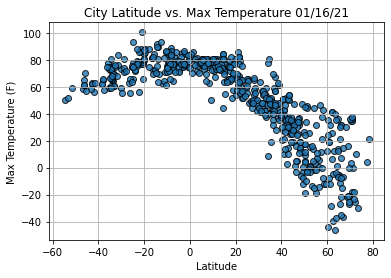

In [44]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

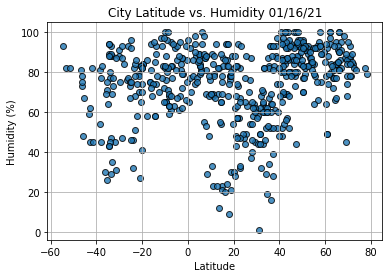

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

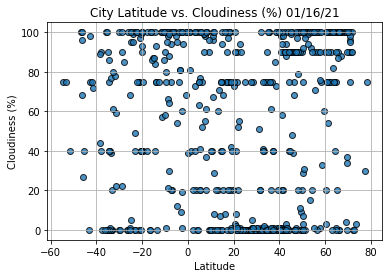

In [46]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

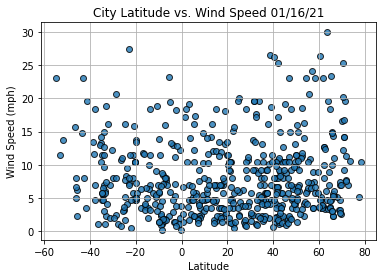

In [47]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()